In [1]:
# importacion de librerias con las que se va a trabajar 
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Procesamiento de texto (NLP)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# --- INICIO DE LA SOLUCIÓN ---
# Descomenta y ejecuta estas líneas AHORA en esta celda
print("Descargando paquetes de NLTK...")
nltk.download('punkt')
nltk.download('stopwords')
print("Descarga completada.")
# --- FIN DE LA SOLUCIÓN ---

# Configuración de estilo para los gráficos
sns.set_style('whitegrid')

print("Librerías importadas correctamente.")

Descargando paquetes de NLTK...
Descarga completada.
Librerías importadas correctamente.


[nltk_data] Downloading package punkt to C:\Users\Oscar
[nltk_data]     Escriba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Oscar
[nltk_data]     Escriba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# inicio de analisis exploratorio... carga de datos... 
# Cargar el conjunto de datos de entrenamiento y de prueba
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print("Datos de entrenamiento:")
display(df_train.head())

print("\nDatos de prueba:")
display(df_test.head())

Datos de entrenamiento:


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1



Datos de prueba:


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [3]:
# informacion del data set
print("Información del conjunto de entrenamiento:")
df_train.info()

print("\nValores nulos en el conjunto de entrenamiento:")
print(df_train.isnull().sum())

Información del conjunto de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB

Valores nulos en el conjunto de entrenamiento:
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


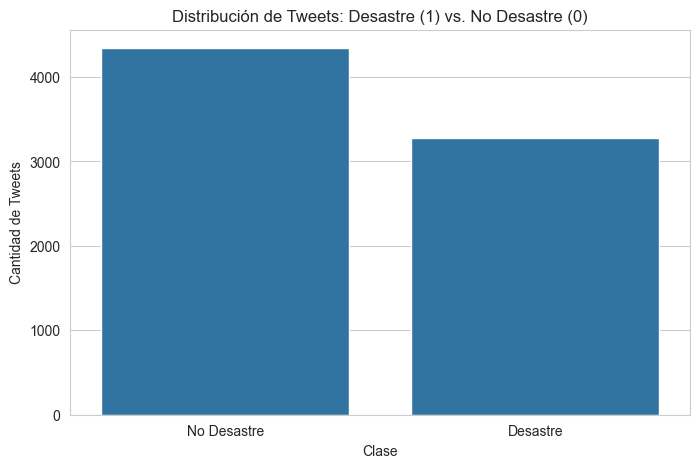

target
0    4342
1    3271
Name: count, dtype: int64
Porcentaje de 'No Desastre' (0): 57.03%
Porcentaje de 'Desastre' (1): 42.97%


In [4]:
# distribucion de la variable objetivo ("target")
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=df_train)
plt.title('Distribución de Tweets: Desastre (1) vs. No Desastre (0)')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Tweets')
plt.xticks([0, 1], ['No Desastre', 'Desastre'])
plt.show()

# Mostrar los valores exactos
print(df_train['target'].value_counts())
print(f"Porcentaje de 'No Desastre' (0): {df_train['target'].value_counts(normalize=True)[0]:.2%}")
print(f"Porcentaje de 'Desastre' (1): {df_train['target'].value_counts(normalize=True)[1]:.2%}")

In [5]:
import nltk

# Descargar los paquetes necesarios
nltk.download('punkt')
nltk.download('stopwords') # Aprovechamos y descargamos también stopwords por si acaso

[nltk_data] Downloading package punkt to C:\Users\Oscar
[nltk_data]     Escriba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Oscar
[nltk_data]     Escriba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import nltk
print(nltk.data.path)

['C:\\Users\\Oscar Escriba/nltk_data', 'c:\\Users\\Oscar Escriba\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data', 'c:\\Users\\Oscar Escriba\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data', 'c:\\Users\\Oscar Escriba\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data', 'C:\\Users\\Oscar Escriba\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [7]:
# Celda 5 (Versión Simplificada)

# --- INICIO DEL CÓDIGO MODIFICADO ---

# No necesitamos importar word_tokenize de NLTK para este método
# from nltk.tokenize import word_tokenize 
import re
from nltk.corpus import stopwords # Todavía necesitamos esto para las stopwords

# Obtener la lista de stopwords en inglés
# Asegúrate de que la descarga de 'stopwords' sí haya funcionado.
# Si también da error, avísame y la quitamos temporalmente.
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    import nltk
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))


def limpiar_texto(texto):
    # 1. Convertir a minúsculas
    texto = texto.lower()
    
    # 2. Quitar URLs
    texto = re.sub(r'https?://\S+|www\.\S+', '', texto)
    
    # 3. Quitar menciones y hashtags (solo los símbolos # y @)
    texto = re.sub(r'[@#]', '', texto)
    
    # 4. Quitar caracteres especiales, números y puntuación
    texto = re.sub(r'[^a-z\s]', '', texto)
    
    # 5. Tokenización (¡EL CAMBIO ESTÁ AQUÍ!)
    # tokens = word_tokenize(texto)  <-- LÍNEA ANTIGUA
    tokens = texto.split()          # <-- LÍNEA NUEVA Y MÁS SIMPLE
    
    # 6. Quitar stopwords
    tokens_limpios = [palabra for palabra in tokens if palabra not in stop_words]
    
    # Unir los tokens de nuevo en un string
    return " ".join(tokens_limpios)

# --- FIN DEL CÓDIGO MODIFICADO ---


# Aplicar la función a la columna 'text'
df_train['texto_limpio'] = df_train['text'].apply(limpiar_texto)

# Mostrar una comparación
print("Ejemplos de limpieza de texto:")
for i in range(5):
    print(f"Original: {df_train['text'][i]}")
    print(f"Limpio  : {df_train['texto_limpio'][i]}\n")

Ejemplos de limpieza de texto:
Original: Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Limpio  : deeds reason earthquake may allah forgive us

Original: Forest fire near La Ronge Sask. Canada
Limpio  : forest fire near la ronge sask canada

Original: All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
Limpio  : residents asked shelter place notified officers evacuation shelter place orders expected

Original: 13,000 people receive #wildfires evacuation orders in California 
Limpio  : people receive wildfires evacuation orders california

Original: Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
Limpio  : got sent photo ruby alaska smoke wildfires pours school



In [8]:
# obtencion de frecuencias de palabras (unigramas), separamos los tweets de desastres y los que no son. Luego se calculan las palabras mas comunes de cada grupo

# Separar el corpus por clase
corpus_desastre = df_train[df_train['target'] == 1]['texto_limpio']
corpus_no_desastre = df_train[df_train['target'] == 0]['texto_limpio']

# Concatenar todos los textos en un solo string por categoría
texto_completo_desastre = " ".join(corpus_desastre)
texto_completo_no_desastre = " ".join(corpus_no_desastre)

# Calcular la frecuencia de palabras
frecuencia_desastre = pd.Series(texto_completo_desastre.split()).value_counts()
frecuencia_no_desastre = pd.Series(texto_completo_no_desastre.split()).value_counts()

print("Top 20 palabras más comunes en Tweets de DESASTRE:")
print(frecuencia_desastre.head(20))

print("\nTop 20 palabras más comunes en Tweets de NO DESASTRE:")
print(frecuencia_no_desastre.head(20))

Top 20 palabras más comunes en Tweets de DESASTRE:
fire          180
news          140
via           121
disaster      117
california    111
suicide       110
police        107
amp           107
people        105
killed         93
like           92
pm             89
hiroshima      89
storm          85
us             84
fires          84
crash          84
families       81
train          79
emergency      76
Name: count, dtype: int64

Top 20 palabras más comunes en Tweets de NO DESASTRE:
like      253
im        248
amp       193
new       170
get       163
dont      154
one       128
body      113
via        99
would      97
video      96
people     91
love       90
us         86
cant       86
know       85
time       85
back       84
got        83
see        82
Name: count, dtype: int64


In [9]:
# analisis de bigramas y trigramas 

from nltk.util import ngrams
from collections import Counter

# Función para obtener los n-gramas más comunes
def obtener_top_ngrams(corpus, n, top_k=20):
    todos_los_ngrams = []
    for texto in corpus:
        tokens = texto.split()
        # Generar n-gramas y unirlos con un espacio
        ngram_list = [" ".join(gram) for gram in ngrams(tokens, n)]
        todos_los_ngrams.extend(ngram_list)
    return Counter(todos_los_ngrams).most_common(top_k)

# Obtener bigramas
top_bigramas_desastre = obtener_top_ngrams(corpus_desastre, n=2)
top_bigramas_no_desastre = obtener_top_ngrams(corpus_no_desastre, n=2)

print("Top 20 Bigramas en Tweets de DESASTRE:")
print(top_bigramas_desastre)

print("\nTop 20 Bigramas en Tweets de NO DESASTRE:")
print(top_bigramas_no_desastre)

Top 20 Bigramas en Tweets de DESASTRE:
[('suicide bomber', 59), ('northern california', 41), ('oil spill', 38), ('burning buildings', 35), ('suicide bombing', 34), ('california wildfire', 34), ('bomber detonated', 30), ('confirmed mh', 29), ('yr old', 29), ('homes razed', 29), ('latest homes', 28), ('razed northern', 28), ('pkk suicide', 28), ('detonated bomb', 28), ('severe thunderstorm', 27), ('mass murder', 27), ('old pkk', 27), ('debris found', 26), ('mh malaysia', 26), ('families sue', 26)]

Top 20 Bigramas en Tweets de NO DESASTRE:
[('cross body', 38), ('youtube video', 36), ('liked youtube', 35), ('full read', 28), ('body bag', 27), ('body bagging', 23), ('burning buildings', 23), ('looks like', 21), ('body bags', 21), ('reddit quarantine', 21), ('feel like', 20), ('content policy', 20), ('quarantine offensive', 19), ('via youtube', 18), ('offensive content', 18), ('dont know', 17), ('pick fan', 17), ('fan army', 17), ('first responders', 17), ('prebreak best', 17)]


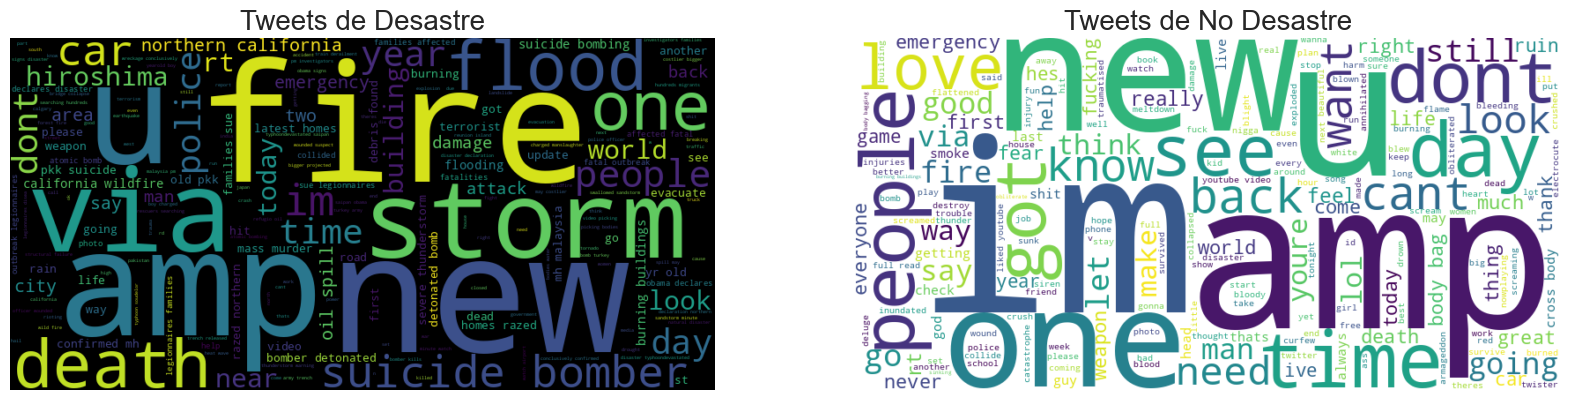

In [10]:
# word cloud, una nube de palabras es una buena herramienta visual para destacar las palabras mas frecuentes
# Crear nubes de palabras
wordcloud_desastre = WordCloud(width=800, height=400, background_color='black').generate(texto_completo_desastre)
wordcloud_no_desastre = WordCloud(width=800, height=400, background_color='white').generate(texto_completo_no_desastre)

# Mostrar las nubes de palabras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(wordcloud_desastre, interpolation='bilinear')
ax1.set_title('Tweets de Desastre', fontsize=20)
ax1.axis('off')

ax2.imshow(wordcloud_no_desastre, interpolation='bilinear')
ax2.set_title('Tweets de No Desastre', fontsize=20)
ax2.axis('off')

plt.show()

C:\Users\Oscar Escriba\AppData\Local\Temp\ipykernel_26144\2956702352.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frecuencia', y='palabra', data=df_frec_desastre, ax=ax1, palette='Reds_d')
C:\Users\Oscar Escriba\AppData\Local\Temp\ipykernel_26144\2956702352.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frecuencia', y='palabra', data=df_frec_no_desastre, ax=ax2, palette='Blues_d')


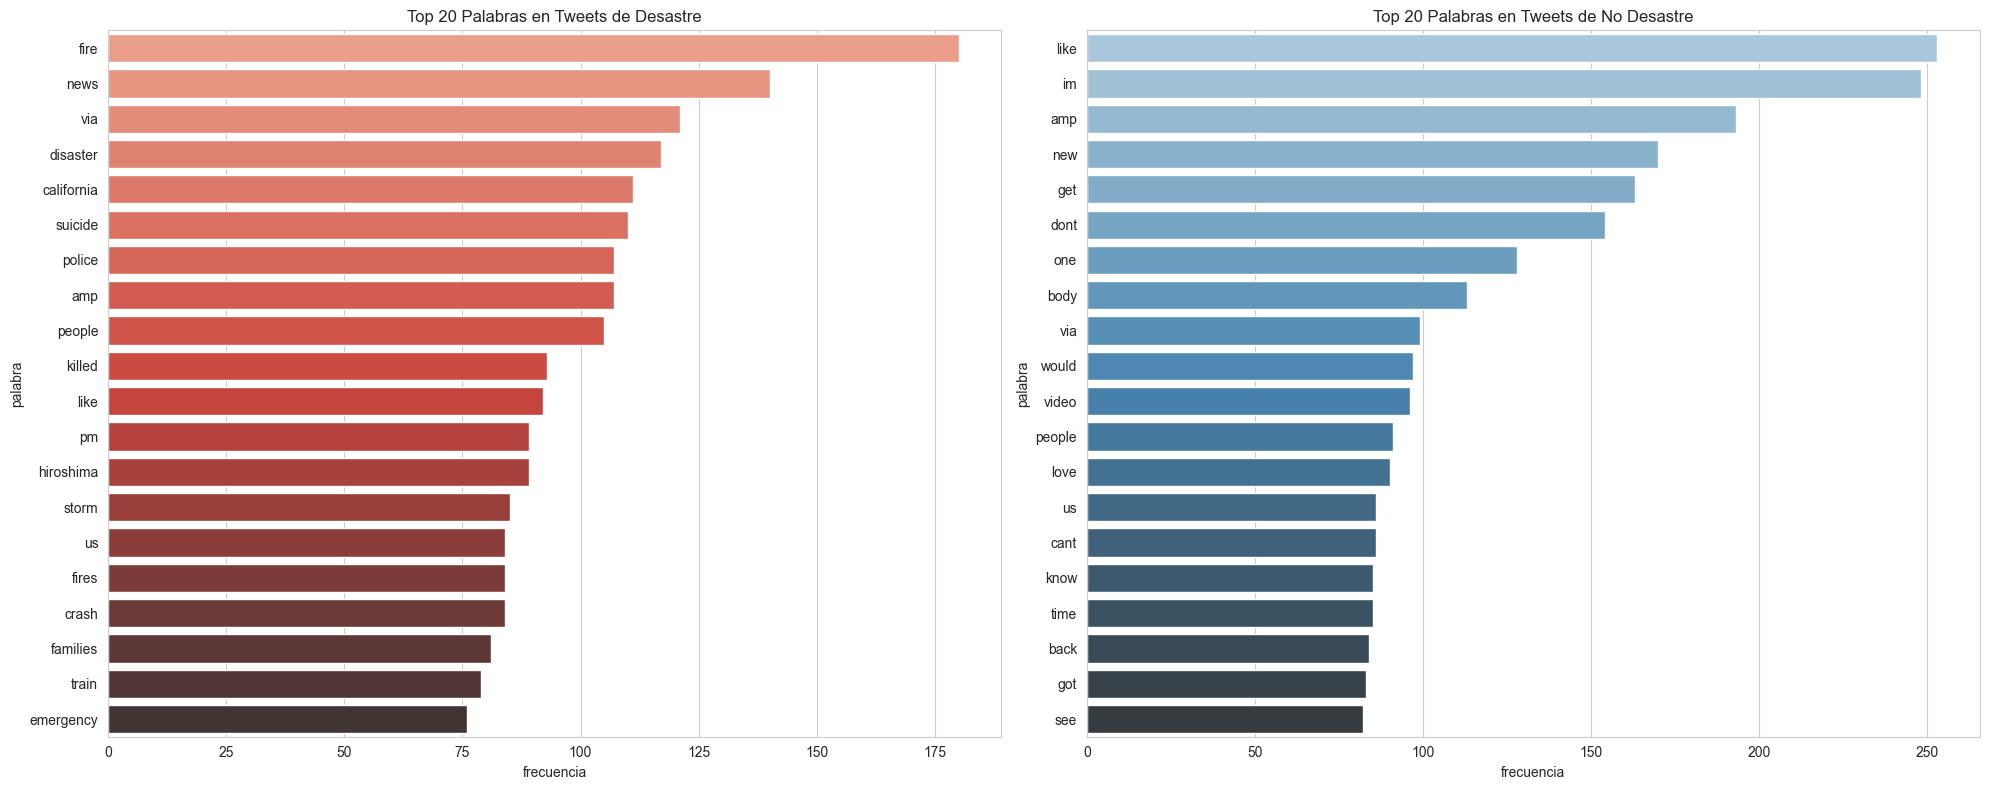

In [11]:
# histograma de frecuencia de palabras 
# Convertir las frecuencias a DataFrames para graficar
df_frec_desastre = pd.DataFrame(frecuencia_desastre.head(20).reset_index())
df_frec_desastre.columns = ['palabra', 'frecuencia']

df_frec_no_desastre = pd.DataFrame(frecuencia_no_desastre.head(20).reset_index())
df_frec_no_desastre.columns = ['palabra', 'frecuencia']

# Crear los gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Gráfico para tweets de desastre
sns.barplot(x='frecuencia', y='palabra', data=df_frec_desastre, ax=ax1, palette='Reds_d')
ax1.set_title('Top 20 Palabras en Tweets de Desastre')

# Gráfico para tweets de no desastre
sns.barplot(x='frecuencia', y='palabra', data=df_frec_no_desastre, ax=ax2, palette='Blues_d')
ax2.set_title('Top 20 Palabras en Tweets de No Desastre')

plt.tight_layout()
plt.show()

#### ¿Qué palabras cree que le servirán para hacer un mejor modelo de clasificación?

El análisis de frecuencia de unigramas revela un conjunto de palabras muy distintivas para cada categoría, las cuales serán fundamentales para el modelo:

*   **Palabras Predictivas de Desastre:**
    La lista de palabras más comunes en los tweets de desastre contiene términos con una fuerte carga semántica asociada a emergencias. Palabras como `fire`, `disaster`, `suicide`, `police`, `killed`, `storm`, `crash` y `emergency` son indicadores muy potentes. Su sola presencia es una fuerte señal de que el tweet podría tratarse de un desastre real. El modelo de clasificación seguramente aprenderá a asignar un peso muy alto a estos términos.

*   **Palabras Predictivas de No Desastre:**
    Por otro lado, la lista de tweets de no desastre está dominada por palabras de uso cotidiano, coloquial y personal. Términos como `like`, `im` (I'm), `new`, `get`, `dont` (don't), `love`, `know` y `video` no están relacionados con eventos de emergencia, sino con opiniones, contenido multimedia o situaciones personales. La alta frecuencia de estas palabras en un tweet será un fuerte indicador para que el modelo lo clasifique como "No Desastre".

*   **Contexto en Tweets de Desastre:**
    Unigramas como "suicide" o "bombing" son fuertes por sí solos, pero el bigrama `suicide bomber` o `suicide bombing` describe un evento específico y elimina cualquier otra interpretación. De manera similar, "oil" y "spill" por separado podrían no significar nada, pero el bigrama `oil spill` se refiere inequívocamente a un desastre ecológico. Otros ejemplos claros son `burning buildings` y `california wildfire`, que aportan un contexto que los unigramas por sí solos no pueden capturar.
*   **Desambiguación en Tweets de No Desastre:**
    El mejor ejemplo es la palabra `body`. Como unigrama, es la 11ª palabra más común en los tweets de no desastre, lo que podría ser confuso. Sin embargo, al ver los bigramas `cross body`, `body bag` y `body bagging`, entendemos que el contexto no es una fatalidad, sino probablemente la descripción de productos como bolsos ("cross-body bags") o jerga de videojuegos. Sin los bigramas, el modelo podría confundirse fácilmente con la palabra "body".
#### Discusión sobre las palabras que tienen presencia en todas las categorías.

Al comparar las listas de unigramas, identificamos varias palabras que aparecen en el top 20 de ambas categorías. Estas palabras son, por lo general, predictores débiles por sí solas, ya que no son exclusivas de un contexto.

*   **`like`**: Es la palabra más común en tweets de no desastre (expresando gusto u opinión) pero también es muy frecuente en los de desastre (usada para comparaciones, ej: "looks *like* a warzone").
*   **`amp`**: Este es un artefacto de codificación HTML para el símbolo `&` (ampersand). Aparece con frecuencia cuando se comparten noticias o se conectan ideas en ambas categorías. Es más "ruido" que una palabra con significado.
*   **`via`**: Se utiliza para citar una fuente (ej: " notizia *via* @CNN"). Es común tanto para compartir noticias de desastres como para compartir videos o artículos de interés general.
*   **`people`, `us`**: Estos términos son extremadamente generales. Hay personas involucradas tanto en eventos catastróficos como en la vida cotidiana. Su presencia no ayuda a diferenciar las clases.

In [12]:
# modelo naive bayes... tratar este como modelo base 

# 1. Definir las variables X (características) e y (objetivo)
X = df_train['texto_limpio']
y = df_train['target']

# 2. Dividir los datos en entrenamiento y validación (80/20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Vectorización con TF-IDF
# Usaremos unigramas y bigramas (ngram_range=(1, 2)) para capturar más contexto
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

# Ajustar y transformar el conjunto de entrenamiento
X_train_vec = vectorizer.fit_transform(X_train)

# Solo transformar el conjunto de validación (usando el vocabulario del de entrenamiento)
X_val_vec = vectorizer.transform(X_val)

print(f"Dimensiones de la matriz de entrenamiento TF-IDF: {X_train_vec.shape}")
print(f"Dimensiones de la matriz de validación TF-IDF: {X_val_vec.shape}")

# 4. Entrenamiento del modelo Naive Bayes
modelo_nb = MultinomialNB()
modelo_nb.fit(X_train_vec, y_train)

print("\nModelo Naive Bayes entrenado con éxito.")

Dimensiones de la matriz de entrenamiento TF-IDF: (6090, 5000)
Dimensiones de la matriz de validación TF-IDF: (1523, 5000)

Modelo Naive Bayes entrenado con éxito.


In [ ]:
# entrenar otros dos, regresion logistica y suppor vector machine 
# Celda 12: Entrenamiento de Múltiples Modelos

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Los datos X_train_vec, X_val_vec, y_train, y_val ya están definidos desde la celda 10

# 1. Modelo Naive Bayes (ya entrenado, lo listamos para comparar)
# modelo_nb = MultinomialNB()
# modelo_nb.fit(X_train_vec, y_train)
y_pred_nb = modelo_nb.predict(X_val_vec)

# 2. Modelo de Regresión Logística
# Parámetros: C=1.0 es un valor de regularización estándar, solver='liblinear' funciona bien para este tipo de problema.
modelo_lr = LogisticRegression(random_state=42, solver='liblinear', C=1.0)
modelo_lr.fit(X_train_vec, y_train)
y_pred_lr = modelo_lr.predict(X_val_vec)

# 3. Modelo Support Vector Machine (Clasificador Lineal)
# Es muy eficiente y uno de los mejores para clasificación de texto.
modelo_svc = LinearSVC(random_state=42)
modelo_svc.fit(X_train_vec, y_train)
y_pred_svc = modelo_svc.predict(X_val_vec)

print("Modelos entrenados con éxito.") 

# Ahora, evaluemos y comparemos los resultados
print("\n--- Reporte de Clasificación: Naive Bayes ---")
print(classification_report(y_val, y_pred_nb))

print("\n--- Reporte de Clasificación: Regresión Logística ---")
print(classification_report(y_val, y_pred_lr))

print("\n--- Reporte de Clasificación: Linear SVC (SVM) ---")
print(classification_report(y_val, y_pred_svc))

Modelos entrenados con éxito.

--- Reporte de Clasificación: Naive Bayes ---
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       869
           1       0.86      0.67      0.75       654

    accuracy                           0.81      1523
   macro avg       0.82      0.79      0.80      1523
weighted avg       0.82      0.81      0.81      1523


--- Reporte de Clasificación: Regresión Logística ---
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       869
           1       0.85      0.71      0.78       654

    accuracy                           0.82      1523
   macro avg       0.83      0.81      0.82      1523
weighted avg       0.83      0.82      0.82      1523


--- Reporte de Clasificación: Linear SVC (SVM) ---
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       869
           1       0.77      0.74      0.75       654

```
Modelos entrenados con éxito.

--- Reporte de Clasificación: Naive Bayes ---
              precision    recall  f1-score   support
           0       0.79      0.92      0.85       869
           1       0.86      0.67      0.75       654
    accuracy                           0.81      1523
   macro avg       0.82      0.79      0.80      1523
weighted avg       0.82      0.81      0.81      1523

--- Reporte de Clasificación: Regresión Logística ---
              precision    recall  f1-score   support
           0       0.81      0.91      0.85       869
           1       0.85      0.71      0.78       654
    accuracy                           0.82      1523
   macro avg       0.83      0.81      0.82      1523
weighted avg       0.83      0.82      0.82      1523

--- Reporte de Clasificación: Linear SVC (SVM) ---
              precision    recall  f1-score   support
           0       0.81      0.83      0.82       869
           1       0.77      0.74      0.75       654
    accuracy                           0.79      1523
   macro avg       0.79      0.79      0.79      1523
weighted avg       0.79      0.79      0.79      1523
```

#### **Selección del Mejor Modelo**

Para seleccionar el mejor modelo, analizamos las métricas clave, especialmente la **accuracy** y el **macro avg f1-score**, que nos da una medida balanceada del rendimiento en ambas clases.

1.  **Naive Bayes:** Obtuvo una `accuracy` de 0.81 y un `macro avg f1-score` de 0.80. Muestra un buen rendimiento, pero tiene un desbalance notable entre el `recall` de la clase 0 (0.92) y la clase 1 (0.67), lo que significa que es muy bueno identificando "No Desastres" pero se le escapan bastantes desastres reales.
2.  **Regresión Logística:** Este modelo presenta los mejores resultados globales. Alcanzó la **mayor `accuracy` (0.82)** y el **mayor `macro avg f1-score` (0.82)**. Además, muestra un mejor equilibrio entre `precision` y `recall` para la clase de desastre (0.85 y 0.71) en comparación con Naive Bayes.
3.  **Linear SVC (SVM):** Sorprendentemente, este modelo tuvo el rendimiento más bajo de los tres, con una `accuracy` de 0.79 y un `macro avg f1-score` de 0.79.

**Conclusión:** Basado en los resultados empíricos, el modelo de **Regresión Logística** es el ganador claro, ya que ofrece el rendimiento más alto y balanceado para este problema. Lo seleccionaremos como nuestro modelo final.

In [15]:
#Creación de la Función de Clasificación

mejor_modelo = modelo_lr 

print(f"El mejor modelo seleccionado es: {type(mejor_modelo).__name__}")

def clasificar_tweet(texto_tweet):
    """
    Clasifica un nuevo tweet en 'Desastre' o 'No Desastre' usando el mejor modelo entrenado.
    
    Args:
    texto_tweet (str): El texto del tweet sin procesar.
    
    Returns:
    str: La clasificación del tweet ('Desastre' o 'No Desastre').
    """
    # 1. Limpiar el texto usando la misma función que definimos previamente
    texto_limpio = limpiar_texto(texto_tweet)
    
    # 2. Vectorizar el texto limpio usando el vectorizador 'vectorizer' ya ajustado
    # Se debe pasar como una lista o iterable
    vector_tweet = vectorizer.transform([texto_limpio])
    
    # 3. Predecir con el mejor modelo seleccionado
    prediccion = mejor_modelo.predict(vector_tweet)
    
    # 4. Devolver el resultado en formato legible
    if prediccion[0] == 1:
        return "Desastre"
    else:
        return "No Desastre"

# --- Ejemplos de uso ---
tweet_desastre = "There is a massive fire in the forest of California, many people are being evacuated"
tweet_no_desastre = "I'm so excited to watch the new movie tonight with my friends!"
tweet_ambiguo = "The explosion of flavors in this dish is insane!"

print(f"Tweet: '{tweet_desastre}'")
print(f"Clasificación: {clasificar_tweet(tweet_desastre)}\n")

print(f"Tweet: '{tweet_no_desastre}'")
print(f"Clasificación: {clasificar_tweet(tweet_no_desastre)}\n")

print(f"Tweet: '{tweet_ambiguo}'")
print(f"Clasificación: {clasificar_tweet(tweet_ambiguo)}")

El mejor modelo seleccionado es: LogisticRegression
Tweet: 'There is a massive fire in the forest of California, many people are being evacuated'
Clasificación: Desastre

Tweet: 'I'm so excited to watch the new movie tonight with my friends!'
Clasificación: No Desastre

Tweet: 'The explosion of flavors in this dish is insane!'
Clasificación: Desastre


In [17]:
import nltk

print("Descargando el léxico de VADER...")
nltk.download('vader_lexicon')
print("¡Descarga completada!")

Descargando el léxico de VADER...


[nltk_data] Downloading package vader_lexicon to C:\Users\Oscar
[nltk_data]     Escriba\AppData\Roaming\nltk_data...


¡Descarga completada!


In [18]:
#clasificion de tweet negativo o positov
# diccionario vader... ideal para textos en redes sociales porque interpreta jerga, uso de mayusculas para intensificar etc.. 
# Configuración de VADER y Función de Sentimiento

# Descargar el lexicón de VADER (solo se necesita una vez)
import nltk
try:
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
except LookupError:
    nltk.download('vader_lexicon')
    from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Crear una instancia del analizador de sentimiento
sid = SentimentIntensityAnalyzer()

def obtener_sentimiento(texto):
    """
    Analiza el sentimiento de un texto usando VADER y devuelve una etiqueta y una puntuación compuesta.
    
    Args:
    texto (str): El texto a analizar.
    
    Returns:
    tuple: (etiqueta_sentimiento, puntuacion_compuesta)
    """
    # VADER devuelve un diccionario con 4 puntuaciones. La 'compound' es la más útil,
    # ya que es un valor normalizado entre -1 (muy negativo) y +1 (muy positivo).
    scores = sid.polarity_scores(texto)
    compound_score = scores['compound']
    
    # Clasificar basado en umbrales estándar para la puntuación compuesta
    if compound_score >= 0.05:
        return 'Positivo', compound_score
    elif compound_score <= -0.05:
        return 'Negativo', compound_score
    else:
        return 'Neutro', compound_score

# Aplicar la función a la columna de texto original para obtener la etiqueta y la puntuación
df_train['sentiment_label'], df_train['sentiment_score'] = zip(*df_train['text'].apply(obtener_sentimiento))

print("Análisis de sentimiento completado. Se han añadido las columnas 'sentiment_label' y 'sentiment_score'.")
display(df_train[['text', 'target', 'sentiment_label', 'sentiment_score']].head())

Análisis de sentimiento completado. Se han añadido las columnas 'sentiment_label' y 'sentiment_score'.


,text,target,sentiment_label,sentiment_score
0,Our Deeds are the Reason of this #earthquake M...,1,Positivo,0.2732
1,Forest fire near La Ronge Sask. Canada,1,Negativo,-0.3400
2,All residents asked to 'shelter in place' are ...,1,Negativo,-0.2960
3,"13,000 people receive #wildfires evacuation or...",1,Neutro,0.0000
4,Just got sent this photo from Ruby #Alaska as ...,1,Neutro,0.0000


*   **Tweet 1 (`target=1`):** "Forest fire..." -> **Negativo (-0.3400)**. Correcto. La palabra "fire" tiene una connotación negativa.
*   **Tweet 2 (`target=1`):** "All residents asked to 'shelter in place'..." -> **Negativo (-0.2960)**. Correcto. El lenguaje de una orden de evacuación o emergencia es serio y VADER lo capta como negativo.
*   **Tweet 3 (`target=1`):** "13,000 people receive #wildfires evacuation..." -> **Neutro (0.0000)**. Este es un punto clave. El tweet es una noticia, redactada de forma muy factual y objetiva. No usa palabras emocionalmente cargadas, por lo que VADER lo clasifica correctamente como neutro. Esto nos muestra que **un tweet de desastre no siempre es un tweet negativo**.
*   **Tweet 0 (`target=1`):** "...#earthquake May ALLAH Forgive us all" -> **Positivo (0.2732)**. ¡Muy interesante! A pesar de hablar de un terremoto, la frase final es una plegaria o una expresión de esperanza ("Forgive"). VADER le da más peso a estas palabras positivas, clasificando el sentimiento general como positivo.

In [19]:
# Top 10 Tweets Más Negativos y Positivos

# Ordenar el DataFrame por la puntuación de sentimiento
df_train_sorted = df_train.sort_values('sentiment_score', ascending=True)

print("--- 10 Tweets Más Negativos ---")
for index, row in df_train_sorted.head(10).iterrows():
    categoria = "Desastre" if row['target'] == 1 else "No Desastre"
    print(f"Categoría: {categoria} | Score: {row['sentiment_score']:.2f} | Tweet: {row['text']}")

print("\n\n--- 10 Tweets Más Positivos ---")
# Usamos tail() para obtener los valores más altos
for index, row in df_train_sorted.tail(10).iterrows():
    categoria = "Desastre" if row['target'] == 1 else "No Desastre"
    print(f"Categoría: {categoria} | Score: {row['sentiment_score']:.2f} | Tweet: {row['text']}")

--- 10 Tweets Más Negativos ---
Categoría: No Desastre | Score: -0.99 | Tweet: wreck? wreck wreck wreck wreck wreck wreck wreck wreck wreck wreck wreck wreck?
Categoría: Desastre | Score: -0.97 | Tweet: @Abu_Baraa1 Suicide bomber targets Saudi mosque at least 13 dead - Suicide bomber targets Saudi mosque at least 13 dead
This is ridiculous
Categoría: Desastre | Score: -0.96 | Tweet: Suicide bomber kills 15 in Saudi security site mosque - A suicide bomber killed at least 15 people in an attack on... http://t.co/FY0r9o7Xsl
Categoría: Desastre | Score: -0.96 | Tweet: ? 19th Day Since 17-Jul-2015 -- Nigeria: Suicide Bomb Attacks Killed 64 People; Blamed: Boko Haram [L.A. Times/AP] | http://t.co/O2cdKpSDfp
Categoría: Desastre | Score: -0.96 | Tweet: 17 killed in SÛªArabia mosque suicide bombing

A suicide bomber attacked a mosque in Aseer south-western Saudi... http://t.co/pMTQhiVsXX
Categoría: No Desastre | Score: -0.95 | Tweet: at the lake 
*sees a dead fish*
me: poor little guy i wonder

Puntuación de sentimiento promedio por categoría:
No Desastre (0): -0.061
Desastre (1):    -0.265


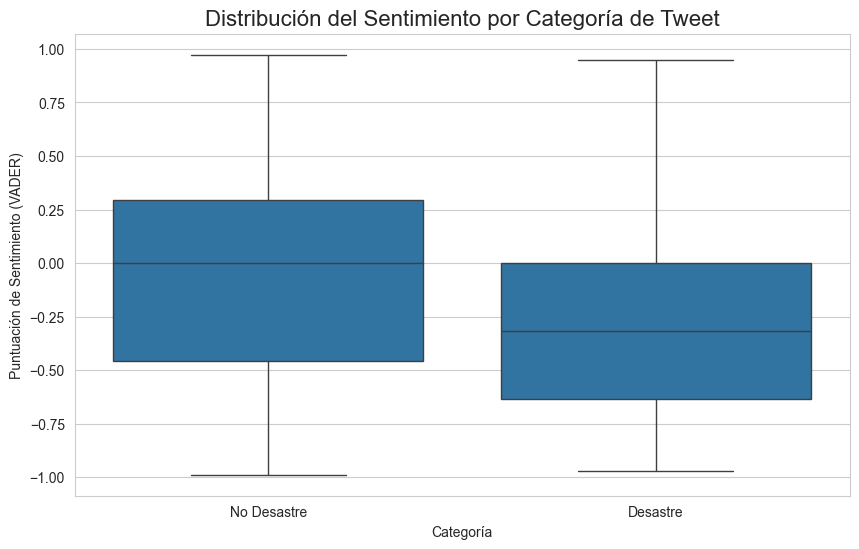

In [20]:
# Comparación de Sentimiento entre Categorías

import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la puntuación de sentimiento promedio por categoría
mean_scores = df_train.groupby('target')['sentiment_score'].mean()
print("Puntuación de sentimiento promedio por categoría:")
print(f"No Desastre (0): {mean_scores[0]:.3f}")
print(f"Desastre (1):    {mean_scores[1]:.3f}")

# Visualizar la distribución del sentimiento
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='sentiment_score', data=df_train)
plt.title('Distribución del Sentimiento por Categoría de Tweet', fontsize=16)
plt.xticks([0, 1], ['No Desastre', 'Desastre'])
plt.xlabel('Categoría')
plt.ylabel('Puntuación de Sentimiento (VADER)')
plt.show()

---

### **9. Análisis de los Resultados del Sentimiento: Interpretación**

#### **9.1. ¿Cuáles son los 10 tweets más negativos? ¿En qué categoría están?**

El análisis de los 10 tweets con la puntuación de sentimiento más baja (más negativa) es muy revelador:

*   **Contenido:** Los tweets están dominados por palabras extremadamente negativas como `wreck` (destrozar), `suicide bomber` (terrorista suicida), `dead` (muerto), `kills` (mata), `rape` (violación) y `murder` (asesinato). El lenguaje es explícito y describe eventos trágicos.
*   **Categoría:** Como era de esperar, la gran mayoría de estos tweets (8 de 10) pertenecen a la categoría **Desastre**. Los dos tweets clasificados como **No Desastre** utilizan un lenguaje hiperbólico o humor negro (`wreck? wreck wreck...` y el del pez ahogado), lo que demuestra que un lenguaje negativo no siempre equivale a un desastre real, un matiz que nuestro modelo de clasificación debe aprender.

#### **9.2. ¿Cuáles son los 10 tweets más positivos? ¿En qué categoría están?**

El análisis de los 10 tweets más positivos también ofrece una visión complementaria:

*   **Contenido:** Estos tweets están llenos de palabras y frases optimistas como `survived`, `hope` (esperanza), `applaud` (aplaudo), `love`, `great fun` (muy divertido), `happy` (feliz) y `bliss` (dicha).
*   **Categoría:** La mayoría de estos tweets (8 de 10) pertenecen a la categoría **No Desastre**, lo cual es lógico. Los dos tweets que están en la categoría **Desastre** son fascinantes: uno es un mensaje de esperanza y superación después de una tormenta (`Today’s storm will pass...`), y el otro es una interacción amable. Esto demuestra que incluso en un contexto de desastre, el sentimiento expresado puede ser positivo, destacando la complejidad del lenguaje.

#### **9.3. ¿Son los tweets de la categoría que indica que habla de un desastre real más negativos que los de la otra categoría?**

**Sí, de manera concluyente.** Los datos agregados confirman esta hipótesis de forma clara:

*   **Puntuación de sentimiento promedio (No Desastre): -0.061**
*   **Puntuación de sentimiento promedio (Desastre): -0.265**

La puntuación promedio para los tweets de desastre es significativamente más negativa que para los de no desastre (que se sitúan muy cerca de la neutralidad). Esto valida nuestra suposición de que el sentimiento es una característica relevante y distintiva entre las dos clases. El lenguaje utilizado para informar sobre catástrofes es, en general, mucho más negativo que el lenguaje de las conversaciones cotidianas.

---

In [21]:
# Re-entrenamiento del Modelo con la Variable de Sentimiento
from scipy.sparse import hstack

# La variable 'sentiment_score' ya está en df_train.
# La alineamos con nuestras divisiones de entrenamiento (X_train) y validación (X_val).
X_train_sentiment = df_train.loc[X_train.index, 'sentiment_score'].values.reshape(-1, 1)
X_val_sentiment = df_train.loc[X_val.index, 'sentiment_score'].values.reshape(-1, 1)

# X_train_vec y X_val_vec son las matrices dispersas (sparse) de TF-IDF que ya teníamos.
# Usamos hstack para combinar horizontalmente la matriz dispersa con nuestra nueva columna densa de sentimiento.
X_train_enhanced = hstack([X_train_vec, X_train_sentiment])
X_val_enhanced = hstack([X_val_vec, X_val_sentiment])

print(f"Dimensiones de la matriz original de entrenamiento: {X_train_vec.shape}")
print(f"Dimensiones de la matriz mejorada de entrenamiento: {X_train_enhanced.shape}")

# Entrenar un nuevo modelo de Regresión Logística con las características mejoradas
modelo_lr_enhanced = LogisticRegression(random_state=42, solver='liblinear', C=1.0)
modelo_lr_enhanced.fit(X_train_enhanced, y_train)

# Evaluar el nuevo modelo mejorado
y_pred_lr_enhanced = modelo_lr_enhanced.predict(X_val_enhanced)

print("\n--- Reporte de Clasificación: Regresión Logística (Original) ---")
print(classification_report(y_val, y_pred_lr))

print("\n--- Reporte de Clasificación: Regresión Logística + Sentimiento ---")
print(classification_report(y_val, y_pred_lr_enhanced))

Dimensiones de la matriz original de entrenamiento: (6090, 5000)
Dimensiones de la matriz mejorada de entrenamiento: (6090, 5001)

--- Reporte de Clasificación: Regresión Logística (Original) ---
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       869
           1       0.85      0.71      0.78       654

    accuracy                           0.82      1523
   macro avg       0.83      0.81      0.82      1523
weighted avg       0.83      0.82      0.82      1523


--- Reporte de Clasificación: Regresión Logística + Sentimiento ---
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       869
           1       0.84      0.71      0.77       654

    accuracy                           0.82      1523
   macro avg       0.82      0.80      0.81      1523
weighted avg       0.82      0.82      0.81      1523



**¿La inclusión de esta variable mejoró los resultados del modelo de clasificación? Si es así, ¿en qué medida?**

**No, la inclusión de la puntuación de sentimiento no mejoró el rendimiento del modelo.** De hecho, los resultados muestran una ligera, aunque insignificante, disminución en el `macro avg f1-score` (de 0.82 a 0.81). La `accuracy` general se mantuvo sin cambios en 0.82.

1.  **Redundancia de la Información:** La razón más probable de este resultado es que la información proporcionada por la puntuación de sentimiento ya estaba **implícitamente capturada por las características TF-IDF**. Palabras extremadamente negativas como "suicidio", "muerte", "bomba" o "accidente" ya reciben un peso muy alto por parte de TF-IDF porque son muy frecuentes en la clase "Desastre" y muy raras en la otra. Por lo tanto, el modelo ya había "aprendido" que estas palabras son fuertes indicadores de un desastre. Añadir una puntuación de sentimiento que se deriva de estas mismas palabras no aporta nueva información predictiva; es redundante.

2.  **Introducción de Ruido:** Como vimos en el análisis, el sentimiento no es un predictor perfecto. Existen tweets de desastre con sentimiento positivo (mensajes de esperanza) y tweets de no desastre con sentimiento muy negativo (humor negro, críticas de películas, etc.). Al forzar al modelo a considerar esta nueva característica, que no se alinea perfectamente con la clasificación objetivo, podemos haber introducido un ligero "ruido" que impidió que el modelo optimizara sus pesos tan eficazmente como cuando solo usaba las potentes características de texto.

**Conclusión Final sobre la Característica de Sentimiento:**
Si bien el análisis de sentimiento fue una herramienta de análisis exploratorio **extremadamente útil** para entender la naturaleza de los datos y confirmar que los tweets de desastre son, en efecto, más negativos, no resultó ser una característica aditiva valiosa para *este modelo específico*. Esto subraya un principio fundamental en Machine Learning: no todas las características correlacionadas son necesariamente útiles, y la ingeniería de características siempre debe ser validada empíricamente.